<a href="https://colab.research.google.com/github/SahputraS/Flu-Forecast/blob/main/Flu_Forecast_VAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
needed.packages <- c('MLmetrics',
                     'janitor',
                     'fpp2',
                     'forecast',
                     'vars',
                     'kableExtra',
                     'geosphere',
                     'sp',
                     'ggdendro',
                     'colorspace',
                     'lubridate',
                     'tidyverse',
                     'imputeTS',
                     'magrittr',
                     'BigVAR',
                     'webshot',
                     'readr',
                     'patchwork',
                     'zoo')

new.packages <- needed.packages[!(needed.packages %in% installed.packages()[,"Package"])]
if(length(new.packages)) install.packages(new.packages, repos = "http://cran.us.r-project.org")
lapply(needed.packages, library, character.only = TRUE)

[[1]]
 [1] "patchwork"   "webshot"     "BigVAR"      "lattice"     "magrittr"   
 [6] "imputeTS"    "forcats"     "stringr"     "dplyr"       "purrr"      
[11] "readr"       "tidyr"       "tibble"      "tidyverse"   "lubridate"  
[16] "colorspace"  "ggdendro"    "sp"          "geosphere"   "kableExtra" 
[21] "vars"        "lmtest"      "urca"        "strucchange" "sandwich"   
[26] "zoo"         "MASS"        "expsmooth"   "fma"         "forecast"   
[31] "ggplot2"     "fpp2"        "janitor"     "MLmetrics"   "stats"      
[36] "graphics"    "grDevices"   "utils"       "datasets"    "methods"    
[41] "base"       

[[2]]
 [1] "patchwork"   "webshot"     "BigVAR"      "lattice"     "magrittr"   
 [6] "imputeTS"    "forcats"     "stringr"     "dplyr"       "purrr"      
[11] "readr"       "tidyr"       "tibble"      "tidyverse"   "lubridate"  
[16] "colorspace"  "ggdendro"    "sp"          "geosphere"   "kableExtra" 
[21] "vars"        "lmtest"      "urca"        "strucchange" "sandwich"   
[26] "zoo"         "MASS"        "expsmooth"   "fma"         "forecast"   
[31] "ggplot2"     "fpp2"        "janitor"     "MLmetrics"   "stats"      
[36] "graphics"    "grDevices"   "utils"       "datasets"    "methods"    
[41] "base"       

[[3]]
 [1] "patchwork"   "webshot"     "BigVAR"      "lattice"     "magrittr"   
 [6] "imputeTS"    "forcats"     "stringr"     "dplyr"       "purrr"      
[11] "readr"       "tidyr"       "tibble"      "tidyverse"   "lubridate"  
[16] "colorspace"  "ggdendro"    "sp"          "geosphere"   "kableExtra" 
[21] "vars"        "lmtest"      "urca"        "strucchange" "sandwich"   
[26] "zoo"         "MASS"        "expsmooth"   "fma"         "forecast"   
[31] "ggplot2"     "fpp2"        "janitor"     "MLmetrics"   "stats"      
[36] "graphics"    "grDevices"   "utils"       "datasets"    "methods"    
[41] "base"       

[[4]]
 [1] "patchwork"   "webshot"     "BigVAR"      "lattice"     "magrittr"   
 [6] "imputeTS"    "forcats"     "stringr"     "dplyr"       "purrr"      
[11] "readr"       "tidyr"       "tibble"      "tidyverse"   "lubridate"  
[16] "colorspace"  "ggdendro"    "sp"          "geosphere"   "kableExtra" 
[21] "vars"        "lmtest"      "urca"        "strucchange" "sandwich"   
[26] "zoo"         "MASS"        "expsmooth"   "fma"         "forecast"   
[31] "ggplot2"     "fpp2"        "janitor"     "MLmetrics"   "stats"      
[36] "graphics"    "grDevices"   "utils"       "datasets"    "methods"    
[41] "base"       

[[5]]
 [1] "patchwork"   "webshot"     "BigVAR"      "lattice"     "magrittr"   
 [6] "imputeTS"    "forcats"     "stringr"     "dplyr"       "purrr"      
[11] "readr"       "tidyr"       "tibble"      "tidyverse"   "lubridate"  
[16] "colorspace"  "ggdendro"    "sp"          "geosphere"   "kableExtra" 
[21] "vars"        "lmtest"      "urca"        "strucchange" "sandwich"   
[26] "zoo"         "MASS"        "expsmooth"   "fma"         "forecast"   
[31] "ggplot2"     "fpp2"        "janitor"     "MLmetrics"   "stats"      
[36] "graphics"    "grDevices"   "utils"       "datasets"    "methods"    
[41] "base"       

[[6]]
 [1] "patchwork"   "webshot"     "BigVAR"      "lattice"     "magrittr"   
 [6] "imputeTS"    "forcats"     "stringr"     "dplyr"       "purrr"      
[11] "readr"       "tidyr"       "tibble"      "tidyverse"   "lubridate"  
[16] "colorspace"  "ggdendro"    "sp"          "geosphere"   "kableExtra" 
[21] "vars"        "lmtest"      "urca"        "strucchange" "sandwich"   
[26] "zoo"         "MASS"        "expsmooth"   "fma"         "forecast"   
[31] "ggplot2"     "fpp2"        "janitor"     "MLmetrics"   "stats"      
[36] "graphics"    "grDevices"   "utils"       "datasets"    "methods"    
[41] "base"       

[[7]]
 [1] "patchwork"   "webshot"     "BigVAR"      "lattice"     "magrittr"   
 [6] "imputeTS"    "forcats"     "stringr"     "dplyr"       "purrr"      
[11] "readr"       "tidyr"       "tibble"      "tidyverse"   "lubridate"  
[16] "colorsp

## Import Data

In [106]:
# Check raw data
url <- "https://raw.githubusercontent.com/european-modelling-hubs/RespiCast-SyndromicIndicators/main/target-data/latest-ILI_incidence.csv"
ili_all <- read_csv(url, show_col_types = FALSE)
head(ili_all)

target,location,truth_date,year_week,value,data_source
<chr>,<chr>,<date>,<chr>,<dbl>,<chr>
ILI incidence,AT,2025-04-06,2025-W14,1724.4,ERVISS
ILI incidence,AT,2025-03-30,2025-W13,1894.2,ERVISS
ILI incidence,AT,2025-03-23,2025-W12,2082.4,ERVISS
ILI incidence,AT,2025-03-16,2025-W11,1706.2,ERVISS
ILI incidence,AT,2025-03-09,2025-W10,2059.3,ERVISS
ILI incidence,AT,2025-03-02,2025-W09,2547.7,ERVISS


In [107]:
ili_data <- ili_all %>%
  dplyr::select(truth_date, location, value) %>%
  rename(date = truth_date, location_name = location) %>%
  arrange(date)

head(ili_data)

date,location_name,value
<date>,<chr>,<dbl>
2021-06-27,BE,26.7
2021-06-27,CZ,3.5
2021-06-27,EE,31.5
2021-06-27,GR,33.5
2021-06-27,IE,5.0
2021-06-27,LT,0.0


## VAR

In [108]:
ts_wide <- ili_data %>%
  arrange(date) %>%
  pivot_wider(names_from = location_name, values_from = value)

countries <- setdiff(names(ts_wide), "date")
cat(countries)

BE CZ EE GR IE LT LU NL PL PT RO SK SI FR DK AT HR FI HU IS LV NO IT MT ES

In [109]:
# Take countries that has complete/almost complete data.
# Drop column if 4 weeks has NaN values or 0s (1 month of data is missing)
cat('NaN in each countries data:')
ts_wide %>% summarise(across(everything(), ~sum(is.na(.)), .names = "na_{col}"))

check_empty_data <- function(x, k = 4) {
  r <- rle(is.na(x) | x == 0)
  any(r$values & r$lengths >= k)
}


mask <- vapply(ts_wide[-1], check_empty_data, logical(1))
keep_names <- c("date", names(ts_wide)[-1][!mask])
ts_picked <- ts_wide[, keep_names, drop = FALSE]

cat("\nDropped countries with >=4 consecutive NAs or 0s:", names(ts_wide)[-1][mask], "\n")
cat("Processing data of", length(keep_names)-1, "countries")

# Interpolate the remaining NAN
ts_clean <- ts_picked %>% mutate(across(-date, ~ na.approx(., na.rm = FALSE)))
ts_clean <- ts_clean %>% mutate(date = as.Date(date))

NaN in each countries data:

na_date,na_BE,na_CZ,na_EE,na_GR,na_IE,na_LT,na_LU,na_NL,na_PL,⋯,na_AT,na_HR,na_FI,na_HU,na_IS,na_LV,na_NO,na_IT,na_MT,na_ES
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,10,2,2,1,2,0,2,⋯,113,50,21,90,42,87,76,109,38,119



Dropped countries with >=4 consecutive NAs: LT PT RO SK SI FR DK AT HR FI HU IS LV NO IT MT ES 
Processing data of 8 countries

In [110]:
train_test_split <- function (data_all, h){

  test_length <- h # weeks
  cut_date <-  tail(data_all$date, h)[1]
  train_data <- data_all %>% filter(date < cut_date)
  test_data <- data_all %>% filter(date >= cut_date)

  return (list(train = train_data, test  = test_data))
}

In [111]:
# Potential optimization is to remove the box-cox transformation in a loop
run_big_var <- function (data, p, h, lam=0){

  train_final <- as.matrix(BoxCox(data + 1, lambda = lam))

  var_mod <- constructModel(train_final,
                            p = p,
                            h = h,
                            struct = 'HLAGOO',
                            cv = "Rolling",
                            gran = c(100, 10),
                            verbose = F
                            )

  var_fit <- cv.BigVAR(var_mod)
  pred <- predict(var_fit, n.ahead = h, confint=TRUE)
  pred_final <- round(InvBoxCox(pred, lambda = lam) - 1)
  return (pred_final)
}

In [112]:
growing_window <- function(data, p, h, burn_in_len, lam=0){

index_end <- nrow(data)
country_names <- colnames(data)[-1]

n_iter <- (index_end- h) - burn_in_len + 1
pred_out <- list()
upper_out <- list()
lower_out <- list()

    for (i in burn_in_len:(index_end - h)){

    train_window <- ts(data[1:i, ] %>% select(-date))
    target_date <- data$date[i + h]
    res <- run_big_var(train_window, p=p, h=h)
    pred <- res[1]
    upper <- res[3]
    lower <- res[2]

    # Organize prediction, upper, and lower
    pred_row <- as_tibble_row(setNames(as.list(as.numeric(pred[, 1, drop = TRUE])), country_names))
    pred_row$date <- target_date

    upper_row <- as_tibble_row(setNames(as.list(as.numeric(upper[, 1, drop = TRUE])), country_names))
    upper_row$date <- target_date

    lower_row <- as_tibble_row(setNames(as.list(as.numeric(lower[, 1, drop = TRUE])), country_names))
    lower_row$date <- target_date

    # target_index   <- i + h
    # pred_row$flag  <- ifelse(target_index > (index_end - h), "test", "train")

    pred_out[[i]] <- pred_row
    upper_out[[i]] <- upper_row
    lower_out[[i]] <- lower_row
  }

  pred_df <- bind_rows(pred_out) %>% mutate(horizon = h)
  upper_df <- bind_rows(upper_out) %>% mutate(horizon = h)
  lower_df <- bind_rows(lower_out) %>% mutate(horizon = h)

  return (list(pred = pred_df, upper = upper_df, lower = lower_df))
}

In [113]:
# data_p <- ts(ts_clean %>% select(-date))
# run_big_var(data_p, p=12, h=1)
aa = growing_window(ts_clean, p=12, h=3, burn_in_len=150)

In [114]:
multi_horizon <- function(data, p, h, burn_in_len, lam = 0) {

  pred_all <- list()
  upper_all <- list()
  lower_all <- list()

  for (hh in 1:h) {
    df_res <- growing_window(data, p = p, h = hh, burn_in_len = burn_in_len, lam = lam)

    pred_res <- df_res$pred
    upper_res <- df_res$upper
    lower_res <- df_res$lower

    pred_all[[hh]] <- pred_res %>% mutate(horizon = hh)
    upper_all[[hh]] <- upper_res %>% mutate(horizon = hh)
    lower_all[[hh]] <- lower_res %>% mutate(horizon = hh)
  }

  bind_rows(pred_all)
  bind_rows(upper_all)
  bind_rows(lower_all)

  return (list(pred = pred_all, upper = upper_all, lower = lower_all))
}

In [115]:
hor = 4
lag = 12
res_df <- multi_horizon(ts_clean, p=lag, h=hor, burn_in_len=200)

In [116]:
pred_df <- bind_rows(res_df$pred)
upper_df <- bind_rows(res_df$upper)
lower_df <- bind_rows(res_df$lower)

## Evaluation

In [117]:
eval_score <- function(pred_mat, true_mat) {
  D <- pred_mat - true_mat

  return(tibble(
    region = colnames(pred_mat),
    MAE  = colMeans(abs(D), na.rm = TRUE),
    RMSE = sqrt(colMeans(D^2, na.rm = TRUE)),
    R2   = 1 - colSums((true_mat - pred_mat)^2, na.rm = TRUE) /
              colSums((true_mat -
                       matrix(colMeans(true_mat, na.rm = TRUE),
                              nrow(true_mat), ncol(true_mat),
                              byrow = TRUE))^2, na.rm = TRUE)
  ))
}

In [130]:
ss <- list()
for (hh in 1:hor) {
  pred_h <- pred_df %>% filter(horizon == hh) %>%
                        select(all_of(keep_names)) %>% arrange(desc(date))


  true_df <- ts_clean %>%
                select(all_of(keep_names)) %>%
                semi_join(pred_h %>% select(date), by = "date") %>% arrange(desc(date))

  pred_mat <- as.matrix(pred_h %>% select (-date))
  true_mat <- as.matrix(true_df %>% select (-date))

  if (identical(names(pred_mat), names(true_mat)) & (all(dim(pred_mat) == dim(true_mat)))){
    print('Calculating the score')
    ss[[hh]] <- eval_score(pred_mat, true_mat) %>% mutate(horizon = hh)
    }
  }
score_full <- bind_rows(ss)

[1] "Calculating the score"
[1] "Calculating the score"
[1] "Calculating the score"
[1] "Calculating the score"


In [132]:
head(score_full,8)

region,MAE,RMSE,R2,horizon
<chr>,<dbl>,<dbl>,<dbl>,<int>
BE,18.520000,22.442192,-1.27979875,1
CZ,0.900000,1.283355,0.11384913,1
EE,24.345000,30.125346,0.69216177,1
GR,42.010000,55.267025,0.71813360,1
IE,1.363158,1.611962,-0.23162469,1
LU,1235.700000,1635.564276,-0.43030864,1
NL,3.700000,5.013582,-0.08656278,1
PL,17.740000,24.067198,0.63735512,1


## Plot

In [133]:
get_plot_df <- function(pred_output, true_data){

# Preparation dataframe to plot
pred_time <- tail(true_data$date, hor)
pred_list <- list()
 for (hh in 1:hor)
  pred_list[[hh]] <- pred_output %>% filter(horizon == hh, date %in% pred_time[[hh]])
pred_plot_df = bind_rows(pred_list)
pred_plot_df <- pred_plot_df  %>% select(-horizon) %>% pivot_longer(-date, names_to = "country", values_to = "value")


true_plot_df <- tail(true_data, hor)
true_plot_df <- true_plot_df  %>% pivot_longer(-date, names_to = "country", values_to = "value")


last_index <- nrow(true_data)
lag_ts <- true_data %>% slice((last_index - hor - lag+ 1L) : (last_index - hor))
lag_ts <- lag_ts %>% pivot_longer(-date, names_to = "country", values_to = "value")

return (list(pred_plot = pred_plot_df, true_plot = true_plot_df, lag_plot = lag_ts))
}

In [134]:
pred_plot = get_plot_df(pred_df, ts_clean)$pred_plot
true_plot = get_plot_df(pred_df, ts_clean)$true_plot
lag_plot = get_plot_df(pred_df, ts_clean)$lag_plot

In [135]:
upper_plot = get_plot_df(upper_df, ts_clean)$pred_plot
lower_plot = get_plot_df(lower_df, ts_clean)$pred_plot

In [136]:
to_long <- function(df, label) df %>% mutate(series = label)

pdat <- bind_rows(
  to_long(true_plot, "true"),
  to_long(pred_plot, "pred"),
  to_long(lag_plot,  "lag"),
  to_long(upper_plot,  "upper"),
  to_long(lower_plot,  "lower")
)

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


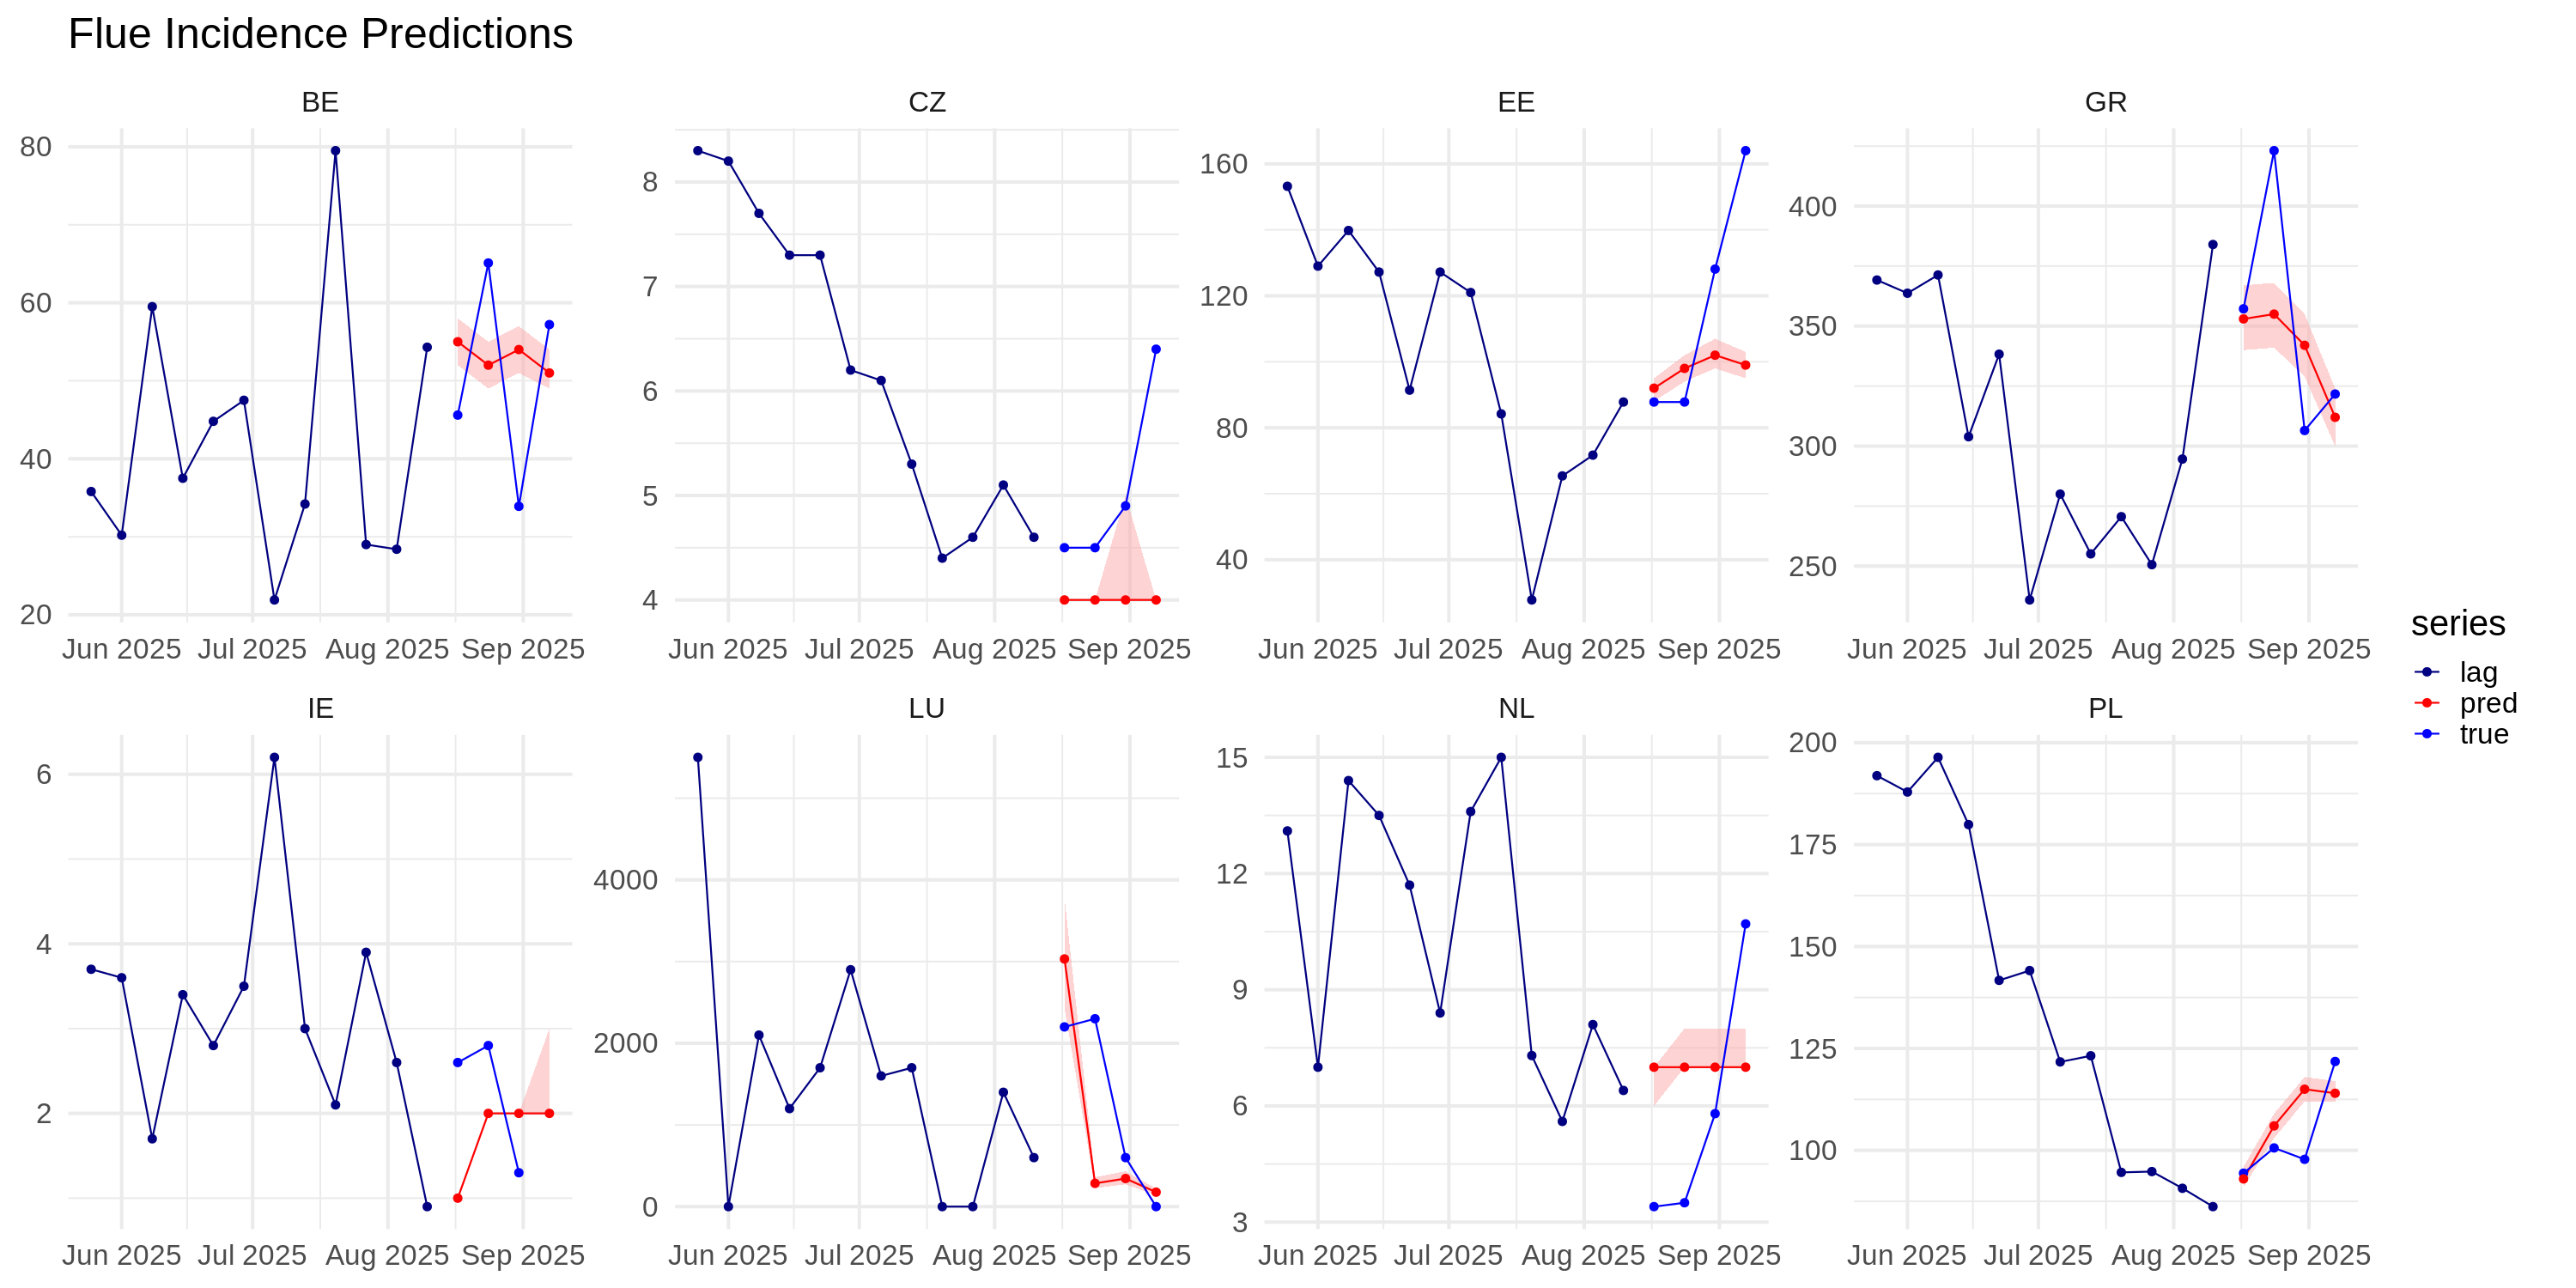

In [146]:
band_df <- pdat %>%
  filter(series %in% c("upper", "lower")) %>%
  pivot_wider(names_from = series, values_from = value) %>%
  filter(!is.na(lower) & !is.na(upper))


plot_data <- pdat %>% filter(!series %in% c("upper", "lower"))


options(repr.plot.width = 20, repr.plot.height = 10, repr.plot.res = 150)

ggplot() +
  geom_ribbon(
    data = band_df,
    aes(x = date, ymin = lower, ymax = upper),
    fill = "#fca7a7", alpha = 0.5
  ) +

  geom_line(data = plot_data, aes(x = date, y = value, color = series)) +
  geom_point(data = plot_data, aes(x = date, y = value, color = series),
             size = 1.8, alpha = 1) +

  facet_wrap(~ country, scales = "free", ncol = 4) +
  labs(title = "Flue Incidence Predictions", x = NULL, y = NULL) +
  scale_x_date(date_labels = "%b %Y", date_breaks = "1 month") +
  scale_color_manual(
    values = c(
      lag  = "navy",
      true = "blue",
      pred = "red"
    )
  ) +
  theme_minimal(base_size = 20)